In [1]:
import datetime
from datetime import datetime
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.pylabtools import figsize
import numpy as np
from jupyter_server.auth import passwd

import veeringCV
import math
from importlib import reload

#from PCA_tests import features

In [2]:
reload(veeringCV)
date = '251019'
ind = 1
sails = ['portMain', 'stbMain', 'portJib', 'stbJib']
files = ['Port Main', 'Stb Main', 'Port Jib', 'Stb Jib']
stripeCounts = [4,4,3,3]
numberStripes = stripeCounts[ind]

importDirectory = os.path.join('/Users/sean/mbp_storage',date,sails[ind])
importPath = os.path.join(importDirectory,files[ind]+'.h5')
print(importDirectory)
print(importPath)

/Users/sean/mbp_storage/251019/stbMain
/Users/sean/mbp_storage/251019/stbMain/Stb Main.h5


In [3]:
threshOffset = 4
multipliers = [0.005, 0.001]
clusterOffset = 0
pic_mult = [0.02, 0.0004]


In [4]:
# normalisations = []
# features = veeringCV.VeeringNormalisation(importPath)
# features.RunNormalisation(normalisations)
# images = np.reshape(features.pixcels, features.origShape, order='F')
# testPic = images[:, :, :, 0]
# plt.imshow(testPic.astype('uint8'))

In [5]:
## Load H5 File
normalisations = [1,3]
features = veeringCV.VeeringNormalisation(importPath)
features.RunNormalisation(normalisations)

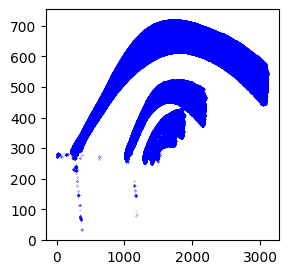

In [6]:
## Generate Pixcels
targetColour = [256,165,130]
searchRange = [175,200,5]

thresholds = veeringCV.Thresholding(features.pixcels,targetColour,searchRange)
thresholds.Run_Thresholding()
thresholds.Generate_Stripe_Pixcels(int(0),features.pixcels,features.origShape)
#thresholds.Count_Filter(float(0.1),float(0.9))
thresholds.Stripes_Plot_Clean()


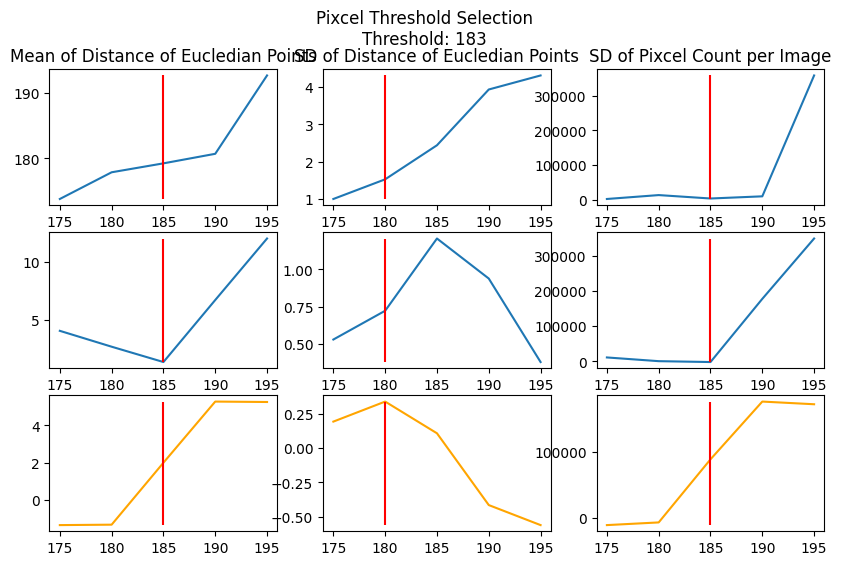

In [7]:
## Thresholds Graph
thresholds.Threshold_Graphs()

In [8]:
## Offset Sweep
#thresholds.Threshold_Sweep_Graphs([0,2,4,6,8], features.origShape, features.pixcels)

In [9]:
thresholds.Generate_Stripe_Pixcels(threshOffset,features.pixcels,features.origShape)

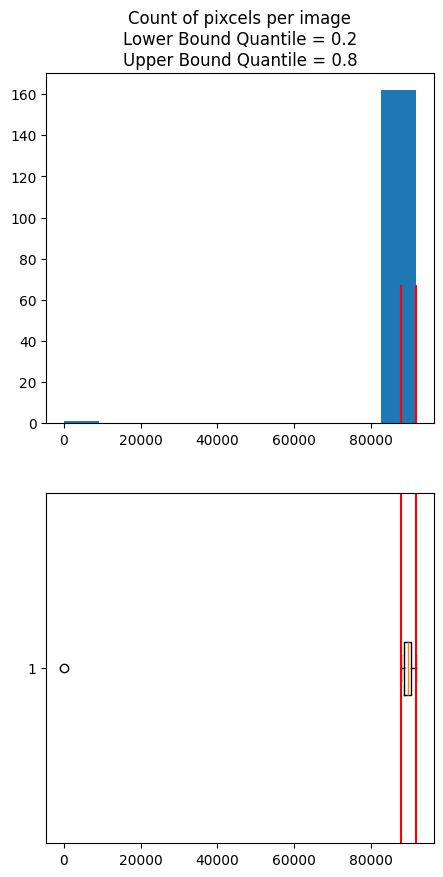

In [10]:
## Count Cleaning Graphs
thresholds.Count_Filter(float(0.2),float(0.8))
thresholds.Cnt_Filter_Plot()

In [11]:
#multipliers = [0.01, 0.004]
countFilter_ind = thresholds.countFilter_ind
#clusterOffset = 1
set_db = veeringCV.Set_DB(thresholds.stripes, multipliers, countFilter_ind, clusterOffset)

In [12]:
set_db.Set_PCA_DB()

2


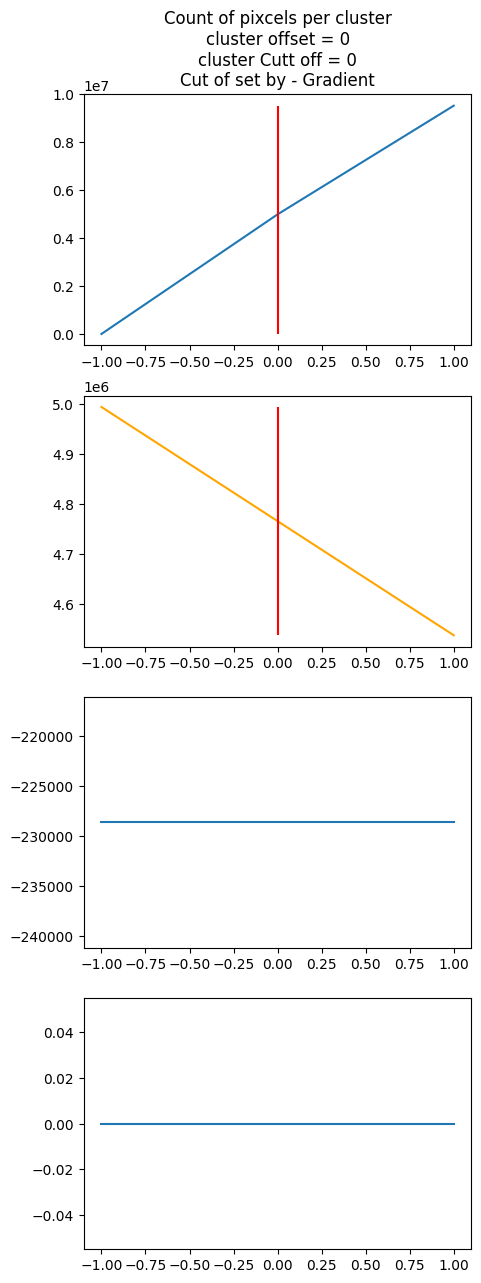

In [13]:
set_db.Cluster_Filter_FIG()

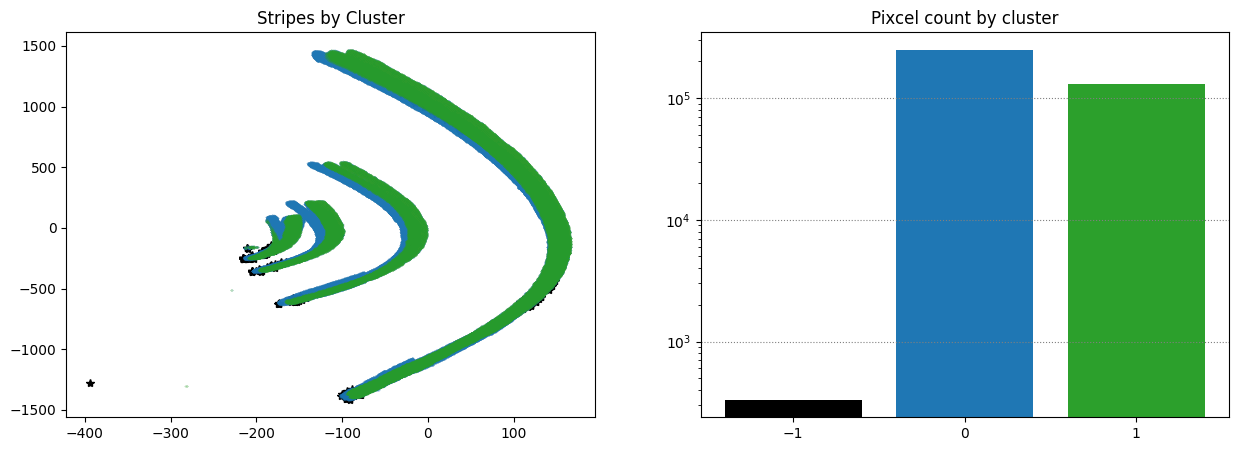

In [14]:
set_db.Cluster_Plot_FIG()

In [15]:
stripes, setPCA = set_db.Make_DB_Scan_Set()

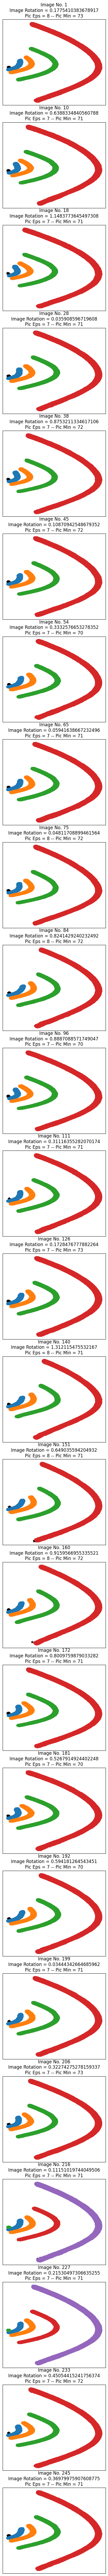

In [16]:
#pic_mult = [0.05, 0.005]
pic_db = veeringCV.Pic_DB(stripes,set_db.setRotation_degrees, setPCA)
pic_db.Pic_DB_Scan(True,25,pic_mult[0],pic_mult[1])

In [17]:
pic_db = veeringCV.Pic_DB(stripes,set_db.setRotation_degrees, setPCA)
pic_db.Pic_DB_Scan(False,25,pic_mult[0],pic_mult[1])

In [18]:
cp_dict = pic_db.clusterPoints_dict

In [19]:
fit_calc = veeringCV.Fit_Spline_Calc(cp_dict, features.origShape, setPCA)
fit_calc.Fit_Splines(False, 0.1, 5, 0.1)
fit_calc.Link_Splines(False, 75, 1.25, 4)
fit_calc.Filter_Splines(numberStripes)
fit_calc.Calc_Properties()

n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 

/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py:925: RuntimeWarning: invalid value encountered in divide
  frontCamber = (frontCamber - draft_vector_rot_origin[0]) / (draft_vector_rot[0] - draft_vector_rot_origin[0])
/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py:929: RuntimeWarning: invalid value encountered in divide
  backCamber = (backCamber - draft_vector_rot_origin[0]) / (draft_vector_rot[0] - draft_vector_rot_origin[0])
/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py:925: RuntimeWarning: divide by zero encountered in divide
  frontCamber = (frontCamber - draft_vector_rot_origin[0]) / (draft_vector_rot[0] - draft_vector_rot_origin[0])


In [1]:
picture = veeringCV.VeeringNormalisation(importPath)
picture.RunNormalisation([])
export_class = veeringCV.Export_Results(picture, features.timestamps,importPath)
export_class.Export_Images(fit_calc.splines_set_final, fit_calc.stripe_properties, ['.pdf', '.jpg'])
export_class.Export_Data_CSV(fit_calc.stripe_properties,numberStripes)
export_class.Export_HyperParams("JNB", str(targetColour), normalisations, thresholds.threshold_offset, thresholds.threshold, thresholds.threshold, thresholds.lowerBound,
                                        thresholds.upperBound, set_db.set_eps_multiplier, set_db.set_min_multiplier, set_db.clusterOffset, pic_mult[0],pic_mult[1],
                                        numberStripes, importPath)

NameError: name 'veeringCV' is not defined

In [20]:
import mysql.connector

cnx = mysql.connector.connect(host="192.168.100.103",
                               user="veering",
                               passwd="veeringRaceReplay!",
                               database="stripeField",
                               port=3307)

In [21]:
existingRecords = [[],[],[],[]]
cursor = cnx.cursor()
query = ("SELECT recordNumber, timeStamp, sailType, board FROM stripeField.index")
cursor.execute(query)
for (recordNumber, timeStamp, sailType, board) in cursor:
    existingRecords[0].append(recordNumber)
    existingRecords[1].append(timeStamp)
    existingRecords[2].append(sailType)
    existingRecords[3].append(board)

cursor.close()

True

In [22]:
newTS  = []
newDates = []
for pic in list(fit_calc.stripe_properties.keys()):
    ts = features.timestamps[pic]
    decoded_string = ts.decode('utf-8')
    dt_object = datetime.strptime(decoded_string, '%Y:%m:%d %H:%M:%S')
    newTS.append(dt_object)
    newDates.append(dt_object.date())

newDates = list(set(newDates))
if sails[ind] == "portJib" or sails[ind] == "portMain":
    board = "p"
else:
    board = "s"
if sails[ind] == "portMain" or sails[ind] == "stbMain":
    sailType_new = "mn"
else:
    sailType_new = "jb"

In [23]:
existingDates = []
for ts_existing in existingRecords[1]:
     existingDates.append(ts_existing.date())

existingDates = list(set(existingDates))


In [24]:
conflict = False
conflict_type = []

if set(newDates) & set(existingDates):
    conflict = True
    conflict_type.append("matchingDates")

if conflict:
    if set(newTS) & set(existingRecords[1]):
        tsMatches = list(set(newTS) & set(existingRecords[1]))
        for ts in tsMatches:
            indexMatches = [i for i, v in enumerate(existingRecords[1]) if v == ts]
            if indexMatches:
                for index in indexMatches:
                    if existingRecords[2][index] == sailType_new:
                        conflict = True
                        conflict_type.append("matchingTimeStampMatchingSailtype")
                        break
                    else:
                        conflict = False
                        conflict_type.append("matchingTimeStampUniqueSailtype")
            if conflict:
                break
    else:
        conflict = False

In [25]:
if conflict:
    print("DO NOT PROCEED CONFLICT")
    for type in conflict_type:
        print("Conflict type: "+type)

else:
    if existingRecords[0]:
        lastEntry = existingRecords[0][-1]
        print("Proceed data does not exist in database")
    else:
        lastEntry = -1
        print("First data in database")


Proceed data does not exist in database


In [26]:
entryNum = 1+lastEntry
picEntry_dict = {}

properties = []
index_list = []

for i in range(numberStripes):
    properties.append([])

for pic in list(fit_calc.stripe_properties.keys()):
    quater = False
    half = False
    threeQuarter = False
    sevenEighth = False

    picEntry_dict[pic] = entryNum
    ts = features.timestamps[pic]
    decoded_string = ts.decode('utf-8')
    dt_object = datetime.strptime(decoded_string, '%Y:%m:%d %H:%M:%S')
    index_list.append(tuple([entryNum, dt_object, sailType_new, board]))

    for stripe in fit_calc.stripe_properties[pic][2]:
        entry = []
        entry.append(entryNum)
        valCheck = False
        for val in stripe[0:5]:
            if math.isnan(val):
                valCheck = True
                break
            elif math.isinf(val):
                valCheck = True
                break
            elif val == 0:
                valCheck = True
                break
            else:
                entry.append(val)
                valCheck = False
        if valCheck:
            entry = []
            entry.append(entryNum)
            for val in stripe[0:5]:
                entry.append(None)

        entry = tuple(entry)
        if stripe[5] == 25:
            properties[0].append(entry)
        elif stripe[5] == 50:
            properties[1].append(entry)
        elif stripe[5] == 75:
            properties[2].append(entry)
        elif stripe[5] == 87:
            properties[3].append(entry)

    entryNum += 1

In [27]:
sql_common = [
    ("INSERT INTO stripeField.index (recordNumber, timestamp, sailType, board) VALUES (%s, %s, %s, %s)"),
]
rows_common = [
    index_list
]

In [28]:
common_status = True

for i in range(len(sql_common)):
    try:
        cursor = cnx.cursor()
        sql = sql_common[i]
        rows = rows_common[i]
        cursor.executemany(sql, rows)
        cnx.commit()
        cursor.close()
    except Exception as e:
        cursor.close()
        common_status = False
        print("Common Failed on "+str(sql_common[i]))
        print(e)

In [29]:
sql_mn = [
    ("INSERT INTO stripeField.mainSail_properties_two (recordNumber, draft, camber, frontCamber, backCamber, twist)"
       "VALUES (%s, %s, %s, %s, %s, %s)"),
    ("INSERT INTO stripeField.mainSail_properties_four (recordNumber, draft, camber, frontCamber, backCamber, twist)"
       "VALUES (%s, %s, %s, %s, %s, %s)"),
    ("INSERT INTO stripeField.mainSail_properties_six (recordNumber, draft, camber, frontCamber, backCamber, twist)"
       "VALUES (%s, %s, %s, %s, %s, %s)"),
    ("INSERT INTO stripeField.mainSail_properties_seven (recordNumber, draft, camber, frontCamber, backCamber, twist)"
       "VALUES (%s, %s, %s, %s, %s, %s)")
]
sql_jib = [
    ("INSERT INTO stripeField.jib_properties_two (recordNumber, draft, camber, frontCamber, backCamber, twist)"
       "VALUES (%s, %s, %s, %s, %s, %s)"),
    ("INSERT INTO stripeField.jib_properties_four (recordNumber, draft, camber, frontCamber, backCamber, twist)"
       "VALUES (%s, %s, %s, %s, %s, %s)"),
    ("INSERT INTO stripeField.jib_properties_six (recordNumber, draft, camber, frontCamber, backCamber, twist)"
       "VALUES (%s, %s, %s, %s, %s, %s)"),
]
if sailType_new == "mn":
    sql_sail = sql_mn
elif sailType_new == "jb":
    sql_sail = sql_jib
else:
    print("error")
if len(sql_sail) != numberStripes:
    print("error")


In [30]:
sail_status = True
sail_succes = []
for i in range(len(sql_sail)):
    try:
        cursor = cnx.cursor()
        sql = sql_sail[i]
        rows = properties[i]
        cursor.executemany(sql, rows)
        cnx.commit()
        cursor.close()
        sail_succes.append(i)
    except Exception as e:
        cursor.close()
        sail_status = False
        print("Sail Failed on "+str(sql_sail[i]))
        print(e)

In [31]:
cnx.close()

In [32]:
cnx = mysql.connector.connect(host="192.168.100.103",
                               user="veering",
                               passwd="veeringRaceReplay!",
                               database="flyingjenny",
                               port=3307)

In [33]:
cursor = cnx.cursor()
query = ("SELECT idPhase, StartTime, StopTime, DurationSec FROM flyingjenny.t_phase")
cursor.execute(query)
searchesPhases = [[],[],[],[]]
for (idPhase, startTime, stopTime, durationSec) in cursor:
    searchesPhases[0].append(idPhase)
    searchesPhases[1].append(startTime)
    searchesPhases[2].append(stopTime)
    searchesPhases[3].append(durationSec)
cursor.close()

True

In [34]:
sf_entryNo_rrp_phaseID = [(t_idx+lastEntry+1, phase_idx) for t_idx, t in enumerate(newTS) for phase_idx, (start, end) in enumerate(zip(searchesPhases[1], searchesPhases[2])) if start <= t < end]
sf_entryNo_rrp_phaseID = list(zip(*sf_entryNo_rrp_phaseID))

In [35]:
columns = ["idPhase", "idBoatDay", "SailingMode", "RaceLegNum", "RaceNum",
           "TWS", "TWA", "BSP_trg", "FORESTAY", "Chock", "D1", "D2",
           "Headstay", "V1", "MainsailBattens"]

cols_sql = ", ".join(f"`{c}`" for c in columns)

phaseAttrib = [[] for _ in columns]

placeholders = ", ".join(["%s"] * len(sf_entryNo_rrp_phaseID[1]))

sql = f"""
SELECT {cols_sql}
FROM flyingjenny.t_phase
WHERE `idPhase` IN ({placeholders})
"""

cursor = cnx.cursor()
cursor.execute(sql, tuple(sf_entryNo_rrp_phaseID[1]))

for row in cursor:  # row is a tuple in same order as columns
    for j, val in enumerate(row):
        phaseAttrib[j].append(val)  # val will be None if SQL NULL
cursor.close()

True

In [36]:
cnx.close()

In [37]:
cnx = mysql.connector.connect(host="192.168.100.103",
                               user="veering",
                               passwd="veeringRaceReplay!",
                               database="stripeField",
                               port=3307)



In [38]:
columns = ["recordNumber", "idPhase", "idBoatDay", "SailingMode", "RaceLegNum",
           "RaceNum", "TWS", "TWA", "BSP_trg", "FORESTAY", "Chock", "D1", "D2",
           "Headstay", "V1", "MainsailBattens"]

table = "stripeField.rrp_phase"

cols_sql = ", ".join(f"`{c}`" for c in columns)
placeholders = ", ".join(["%s"] * len(columns))
phaseAttrib.insert(0,list(sf_entryNo_rrp_phaseID[0]))

sql = f"""INSERT INTO {table} ({cols_sql}) VALUES ({placeholders})
"""
cursor = cnx.cursor()
cursor.executemany(sql, list(zip(*phaseAttrib)))
cnx.commit()
cursor.close()


True

In [39]:
cnx.close()